![ieseg logo](./img/ieseg.png)

## InClass Kaggle (Individual Assignment) 

### Submitted By - Prineet Kaur Bhurji

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Importing machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
# For computing the scores etc
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score, log_loss

# Data Preparation

In [2]:
# Reading the datasets
train_set = pd.read_csv('./Data/orange_churn_train.csv')
predict_set = pd.read_csv('./Data/orange_churn_test.csv')

In [3]:
train_set.head()

,cust_id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,churn
0,3,NaN,NaN,NaN,NaN,NaN,1351.0,7.0,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,ELof,7P5s,ZI9m,NoEd,mj86,NaN,0
1,4,NaN,NaN,NaN,NaN,NaN,644.0,0.0,NaN,NaN,...,76DJixu,LM8l689qOp,NaN,NaN,7P5s,RAYp,F2FyR07IdsN7I,NaN,NaN,0
2,7,NaN,NaN,NaN,NaN,NaN,2583.0,0.0,NaN,NaN,...,I5dzv5f,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN,1
3,8,NaN,NaN,NaN,NaN,NaN,1463.0,7.0,NaN,NaN,...,xwyAw04,LM8l689qOp,NaN,kG3k,fKCe,RAYp,F2FyR07IdsN7I,mj86,NaN,0
4,9,NaN,NaN,NaN,NaN,NaN,77.0,0.0,NaN,NaN,...,76DJixu,NaN,NaN,NaN,7P5s,RAYp,F2FyR07IdsN7I,NaN,NaN,0


In [4]:
na_table = pd.DataFrame(train_set.isna().sum())
train_set.shape

(10000, 232)

In [5]:
# Deleting columns with all NaN values
train_set = train_set.dropna(axis=1, how='all')
# confirming the columns dropped
train_set.shape

(10000, 214)

In [6]:
# Deleting columns where the values is greater than a certain threshold

# Setting my threshold of total rows - 1000
# my_thresh = len(train_set) - 1000

# Dropping the columns
# train_set = train_set.dropna(thresh=my_thresh, axis=1)

In [7]:
# Checking the shape
train_set.shape

(10000, 214)

In [8]:
list(train_set.columns)

['cust_id',
 'Var1',
 'Var2',
 'Var3',
 'Var4',
 'Var5',
 'Var6',
 'Var7',
 'Var9',
 'Var10',
 'Var11',
 'Var12',
 'Var13',
 'Var14',
 'Var16',
 'Var17',
 'Var18',
 'Var19',
 'Var21',
 'Var22',
 'Var23',
 'Var24',
 'Var25',
 'Var26',
 'Var27',
 'Var28',
 'Var29',
 'Var30',
 'Var33',
 'Var34',
 'Var35',
 'Var36',
 'Var37',
 'Var38',
 'Var40',
 'Var41',
 'Var43',
 'Var44',
 'Var45',
 'Var46',
 'Var47',
 'Var49',
 'Var50',
 'Var51',
 'Var53',
 'Var54',
 'Var56',
 'Var57',
 'Var58',
 'Var59',
 'Var60',
 'Var61',
 'Var62',
 'Var63',
 'Var64',
 'Var65',
 'Var66',
 'Var67',
 'Var68',
 'Var69',
 'Var70',
 'Var71',
 'Var72',
 'Var73',
 'Var74',
 'Var75',
 'Var76',
 'Var77',
 'Var78',
 'Var80',
 'Var81',
 'Var82',
 'Var83',
 'Var84',
 'Var85',
 'Var86',
 'Var87',
 'Var88',
 'Var89',
 'Var90',
 'Var91',
 'Var92',
 'Var93',
 'Var94',
 'Var95',
 'Var96',
 'Var97',
 'Var98',
 'Var99',
 'Var100',
 'Var101',
 'Var102',
 'Var103',
 'Var104',
 'Var105',
 'Var106',
 'Var107',
 'Var108',
 'Var109',
 'Var1

In [9]:
train_set.head(10)

,cust_id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,churn
0,3,NaN,NaN,NaN,NaN,NaN,1351.0,7.0,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,ELof,7P5s,ZI9m,NoEd,mj86,0
1,4,NaN,NaN,NaN,NaN,NaN,644.0,0.0,NaN,NaN,...,oslk,76DJixu,LM8l689qOp,NaN,NaN,7P5s,RAYp,F2FyR07IdsN7I,NaN,0
2,7,NaN,NaN,NaN,NaN,NaN,2583.0,0.0,NaN,NaN,...,oslk,I5dzv5f,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,1
3,8,NaN,NaN,NaN,NaN,NaN,1463.0,7.0,NaN,NaN,...,oslk,xwyAw04,LM8l689qOp,NaN,kG3k,fKCe,RAYp,F2FyR07IdsN7I,mj86,0
4,9,NaN,NaN,NaN,NaN,NaN,77.0,0.0,NaN,NaN,...,oslk,76DJixu,NaN,NaN,NaN,7P5s,RAYp,F2FyR07IdsN7I,NaN,0
5,14,NaN,NaN,NaN,NaN,NaN,2037.0,7.0,NaN,NaN,...,oslk,MRPKMwm,LM8l689qOp,NaN,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN,0
6,15,NaN,NaN,NaN,NaN,NaN,2499.0,7.0,NaN,NaN,...,zCkv,APgdzOv,LM8l689qOp,NaN,kG3k,Aoh3,6fzt,xwM2aC7IdeMC0,am7c,0
7,18,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,oslk,YFaA9vx,LM8l689qOp,NaN,NaN,Aoh3,RAYp,F2FyR07IdsN7I,NaN,0
8,19,NaN,NaN,NaN,NaN,NaN,175.0,7.0,NaN,NaN,...,oslk,ZI_Qhib,LM8l689qOp,NaN,xG3x,7FJQ,RAYp,55YFVY9,NaN,0
9,21,NaN,NaN,NaN,NaN,NaN,679.0,7.0,NaN,NaN,...,oslk,poModIn,LM8l689qOp,NaN,xG3x,wX53,RAYp,55YFVY9,am7c,0


In [10]:
# replacing the nan values for the numerical columns with -1

# defining the numerical columns
num_cols = ['cust_id', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var9', 'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var16', 'Var17', 'Var18', 'Var19', 'Var21', 'Var22', 'Var23', 'Var24', 'Var25', 'Var26', 'Var27', 'Var28', 'Var29','Var30', 'Var33', 'Var34', 'Var35', 'Var36', 'Var37', 'Var38', 'Var40', 'Var41', 'Var43', 'Var44', 'Var45', 'Var46', 'Var47','Var49', 'Var50', 'Var51', 'Var53', 'Var54', 'Var56', 'Var57', 'Var58', 'Var59', 'Var60', 'Var61', 'Var62', 'Var63', 'Var64','Var65', 'Var66', 'Var67', 'Var68', 'Var69', 'Var70', 'Var71', 'Var72', 'Var73', 'Var74', 'Var75', 'Var76', 'Var77', 'Var78','Var80', 'Var81', 'Var82', 'Var83', 'Var84', 'Var85', 'Var86', 'Var87', 'Var88', 'Var89', 'Var90', 'Var91', 'Var92', 'Var93','Var94', 'Var95', 'Var96', 'Var97', 'Var98', 'Var99', 'Var100', 'Var101', 'Var102', 'Var103', 'Var104', 'Var105', 'Var106','Var107', 'Var108', 'Var109', 'Var110', 'Var111', 'Var112', 'Var113', 'Var114', 'Var115', 'Var116', 'Var117', 'Var118','Var119', 'Var120', 'Var121', 'Var122', 'Var123', 'Var124', 'Var125', 'Var126', 'Var127', 'Var128', 'Var129', 'Var130','Var131', 'Var132', 'Var133', 'Var134', 'Var135', 'Var136', 'Var137', 'Var138', 'Var139', 'Var140', 'Var142', 'Var143','Var144', 'Var145', 'Var146', 'Var147', 'Var148', 'Var149', 'Var150', 'Var151', 'Var152', 'Var153', 'Var154', 'Var155','Var156', 'Var157', 'Var158', 'Var159', 'Var160', 'Var161', 'Var162', 'Var163', 'Var164', 'Var165', 'Var166', 'Var168','Var170', 'Var171', 'Var172', 'Var173', 'Var174', 'Var176', 'Var177', 'Var178', 'Var179', 'Var180', 'Var181',]

train_set[num_cols]=train_set[num_cols].fillna(-1)

In [11]:
train_set.head(10)

,cust_id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,churn
0,3,-1.0,-1.0,-1.0,-1.0,-1.0,1351.0,7.0,-1.0,-1.0,...,zCkv,catzS2D,LM8l689qOp,NaN,ELof,7P5s,ZI9m,NoEd,mj86,0
1,4,-1.0,-1.0,-1.0,-1.0,-1.0,644.0,0.0,-1.0,-1.0,...,oslk,76DJixu,LM8l689qOp,NaN,NaN,7P5s,RAYp,F2FyR07IdsN7I,NaN,0
2,7,-1.0,-1.0,-1.0,-1.0,-1.0,2583.0,0.0,-1.0,-1.0,...,oslk,I5dzv5f,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,1
3,8,-1.0,-1.0,-1.0,-1.0,-1.0,1463.0,7.0,-1.0,-1.0,...,oslk,xwyAw04,LM8l689qOp,NaN,kG3k,fKCe,RAYp,F2FyR07IdsN7I,mj86,0
4,9,-1.0,-1.0,-1.0,-1.0,-1.0,77.0,0.0,-1.0,-1.0,...,oslk,76DJixu,NaN,NaN,NaN,7P5s,RAYp,F2FyR07IdsN7I,NaN,0
5,14,-1.0,-1.0,-1.0,-1.0,-1.0,2037.0,7.0,-1.0,-1.0,...,oslk,MRPKMwm,LM8l689qOp,NaN,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN,0
6,15,-1.0,-1.0,-1.0,-1.0,-1.0,2499.0,7.0,-1.0,-1.0,...,zCkv,APgdzOv,LM8l689qOp,NaN,kG3k,Aoh3,6fzt,xwM2aC7IdeMC0,am7c,0
7,18,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,oslk,YFaA9vx,LM8l689qOp,NaN,NaN,Aoh3,RAYp,F2FyR07IdsN7I,NaN,0
8,19,-1.0,-1.0,-1.0,-1.0,-1.0,175.0,7.0,-1.0,-1.0,...,oslk,ZI_Qhib,LM8l689qOp,NaN,xG3x,7FJQ,RAYp,55YFVY9,NaN,0
9,21,-1.0,-1.0,-1.0,-1.0,-1.0,679.0,7.0,-1.0,-1.0,...,oslk,poModIn,LM8l689qOp,NaN,xG3x,wX53,RAYp,55YFVY9,am7c,0


In [12]:
# defining the variable columns
var_cols = ['Var182', 'Var183', 'Var184', 'Var186', 'Var187', 'Var188', 'Var189', 'Var190', 'Var191', 'Var192', 'Var193','Var194', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199', 'Var200', 'Var201', 'Var202', 'Var203', 'Var204', 'Var205','Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212', 'Var213', 'Var214', 'Var215', 'Var216', 'Var217', 'Var218','Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var224', 'Var225', 'Var226', 'Var227', 'Var228', 'Var229']

In [13]:
train_set[num_cols]=train_set[num_cols].astype('str')

In [14]:
train_set[var_cols]=train_set[var_cols].astype('str')

In [15]:
# creating instance of labelencoder
le = LabelEncoder()

In [16]:
for var in var_cols:
    train_set.loc[:,var] = le.fit_transform(train_set.loc[:,var])

In [17]:
train_set.shape

(10000, 214)

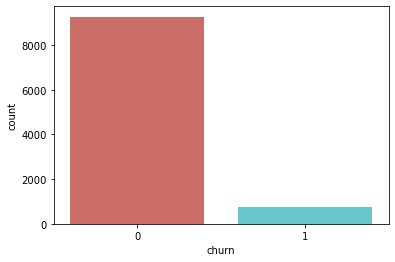

0    9264
1     736
Name: churn, dtype: int64

In [18]:
# Distribution of the Dependent Variable
countplt=sns.countplot(x="churn", data=train_set, palette ='hls')
plt.show()
train_set["churn"].value_counts()

In [19]:
train_set[num_cols]=train_set[num_cols].astype('float')

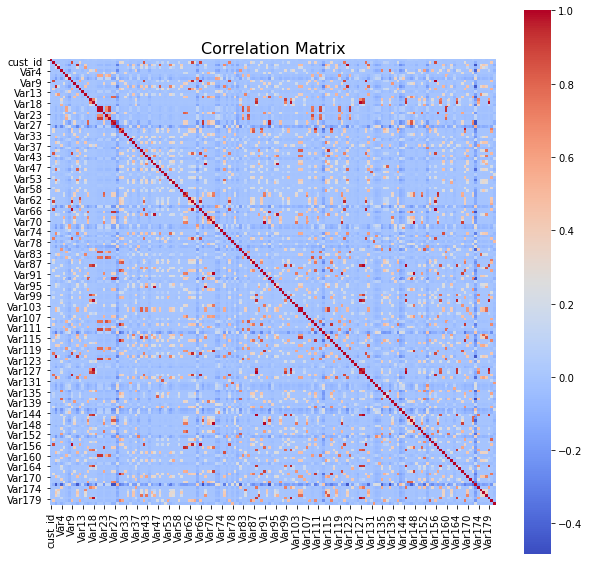

In [20]:
#correlation of numerical variables
train_corr = train_set[num_cols]
num_corr = train_set[num_cols].corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(num_corr, cbar=True, cmap="coolwarm",square=True,ax=ax)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [21]:
train_set.head()

,cust_id,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,churn
0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,1351.0,7.0,-1.0,-1.0,...,6,1289,0,1,0,4,3,9,1,0
1,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,644.0,0.0,-1.0,-1.0,...,4,184,0,1,2,4,2,7,2,0
2,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,2583.0,0.0,-1.0,-1.0,...,4,578,0,1,2,7,2,7,2,1
3,8.0,-1.0,-1.0,-1.0,-1.0,-1.0,1463.0,7.0,-1.0,-1.0,...,4,1975,0,1,1,14,2,7,1,0
4,9.0,-1.0,-1.0,-1.0,-1.0,-1.0,77.0,0.0,-1.0,-1.0,...,4,184,4,1,2,4,2,7,2,0


In [22]:
# Saving the Final Dataset to a "CSV File"
train_set.to_csv('Basetable.csv', mode='a')

## Splitting the Data into Train and Test

In [23]:
# Splitting into train and validation
train, validation = train_test_split(train_set, test_size=0.30, random_state = 1)

In [24]:
print("train")
print(train.churn.value_counts() , train.shape)
print("validation")
print(validation.churn.value_counts(), validation.shape)

train
0    6494
1     506
Name: churn, dtype: int64 (7000, 214)
validation
0    2770
1     230
Name: churn, dtype: int64 (3000, 214)


## Defining the Dependent Variable (Target) and the Independent Variables (Features)

In [25]:
#through running a model and getting the features
features = list(train_set.columns)
features.remove('churn')
target = "churn"

## Variable Selection (Feature Importance) and Hyper-parameter Tuning (Early Stopping)

In [26]:
import lightgbm as lgb

# Initialize an empty array to hold feature importances
feature_importances = np.zeros(len(features))

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

# Fit the model twice to avoid overfitting

for i in range(2):
    # Train using early stopping
    model.fit(train[features], train[target], early_stopping_rounds=500, eval_set = [(validation[features], validation[target])],
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_


Training until validation scores don't improve for 500 rounds
[200]	valid_0's auc: 0.69277	valid_0's binary_logloss: 0.280621
[400]	valid_0's auc: 0.689928	valid_0's binary_logloss: 0.35977
Early stopping, best iteration is:
[29]	valid_0's auc: 0.71375	valid_0's binary_logloss: 0.469816
Training until validation scores don't improve for 500 rounds
[200]	valid_0's auc: 0.69277	valid_0's binary_logloss: 0.280621
[400]	valid_0's auc: 0.689928	valid_0's binary_logloss: 0.35977
Early stopping, best iteration is:
[29]	valid_0's auc: 0.71375	valid_0's binary_logloss: 0.469816


In [27]:
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(features), 'importance': feature_importances}).sort_values('importance', ascending = False)

In [28]:
feature_importances

,feature,importance
115,Var126,47.0
0,cust_id,44.0
183,Var199,36.0
176,Var192,32.0
200,Var217,32.0
...,...,...
116,Var127,0.0
117,Var128,0.0
118,Var129,0.0
119,Var130,0.0


In [29]:
#Selecting the top features
selectedFeatures = feature_importances.iloc[:62,0]

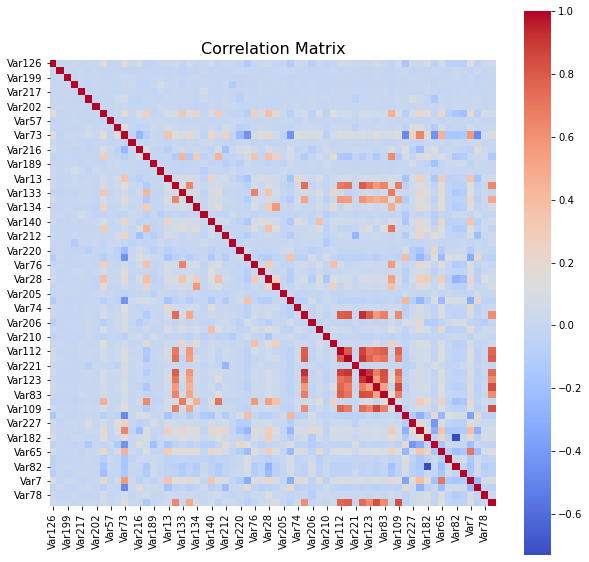

In [30]:
#correlation of numerical variables
# train_corr = train_set[num_cols]
num_corr = train_set[selectedFeatures].corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(num_corr, cbar=True, cmap="coolwarm",square=True,ax=ax)
plt.title("Correlation Matrix", fontsize=16,)
plt.show()

## Model Building

In [31]:
Logistic           = LogisticRegression(solver = "lbfgs", max_iter=1000)  
RandomForest       = RandomForestClassifier()                             
BoostedTree        = GradientBoostingClassifier()                         
SVM                = SVC(gamma = "scale", probability = True)             
ADAboost           = AdaBoostClassifier()                                 
Catboost           = CatBoostClassifier(task_type = 'CPU',verbose=False)  
LinearDiscriminant = LinearDiscriminantAnalysis()
NeuralNet          = MLPClassifier()
Neighbors          = KNeighborsClassifier()
Xboost             = XGBClassifier()

In [32]:
# Defining the models as dictionary to run them all together
models = {"Logistic"           :Logistic,
          "RandomForest"       :RandomForest,
          "BoostedTree"        :BoostedTree,
          "SVM"                :SVM,
          "ADAboost"           :ADAboost,
          "Catboost"           :Catboost,
          "LinearDiscriminant" :LinearDiscriminant,
          "NeuralNet"          :NeuralNet,
          "Neighbors"          :Neighbors,
          "Xboost"             :Xboost
         }

In [33]:
# Fitting the models
for model in models:
    models[model].fit(train[selectedFeatures],train[target])
    print(f"{model} has been trained successfully")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic has been trained successfully
RandomForest has been trained successfully
BoostedTree has been trained successfully
SVM has been trained successfully
ADAboost has been trained successfully
Catboost has been trained successfully
LinearDiscriminant has been trained successfully
NeuralNet has been trained successfully
Neighbors has been trained successfully
[22:02:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Xboost has been trained successfully


## Checking the Performance of the Model using Evaluation Metric (AUC & Accuracy)

In [34]:
performances_training = {}

for model in models:
    predictions   = models[model].predict(train[selectedFeatures])
    probabilities = pd.DataFrame(models[model].predict_proba(train[selectedFeatures]))[1]
    accuracy      = accuracy_score(train[target],predictions)
    auc           = roc_auc_score(np.array(train[target]),np.array(probabilities))
    
    performances_training[model] = {"Accuracy":accuracy,"AUC":auc}

In [35]:
pd.DataFrame(performances_training)

,Logistic,RandomForest,BoostedTree,SVM,ADAboost,Catboost,LinearDiscriminant,NeuralNet,Neighbors,Xboost
Accuracy,0.927429,1.0,0.934857,0.927714,0.927286,0.954857,0.928000,0.792714,0.927571,1.0
AUC,0.533896,1.0,0.895937,0.405778,0.805951,0.996485,0.666608,0.554581,0.888172,1.0


In [36]:
performances = {}

for model in models:
    predictions   = models[model].predict(validation[selectedFeatures])
    probabilities = pd.DataFrame(models[model].predict_proba(validation[selectedFeatures]))[1]
    accuracy      = accuracy_score(validation[target],predictions)
    auc           = roc_auc_score(np.array(validation[target]),np.array(probabilities))
    
    performances[model] = {"Accuracy":accuracy,"AUC":auc}
    

In [37]:
pd.DataFrame(performances)

,Logistic,RandomForest,BoostedTree,SVM,ADAboost,Catboost,LinearDiscriminant,NeuralNet,Neighbors,Xboost
Accuracy,0.923333,0.923333,0.921667,0.923333,0.922667,0.922333,0.923333,0.767000,0.920667,0.922667
AUC,0.544962,0.673015,0.737829,0.467255,0.690058,0.714189,0.644797,0.481084,0.513808,0.667944


## Preparing the Prediction Dataset

Need to match the prediction dataset to the same structure as the train/validation dataset

In [38]:
# replacing the nan values for the numerical columns with -1
predict_set[num_cols]=predict_set[num_cols].fillna(-1)

In [39]:
predict_set[num_cols]=predict_set[num_cols].astype('str')

In [40]:
predict_set[var_cols]=predict_set[var_cols].astype('str')

In [41]:
# label encoding the categorical variables
for var in var_cols:
    predict_set.loc[:,var] = le.fit_transform(predict_set.loc[:,var])

In [42]:
predict_set = predict_set[selectedFeatures]

## Saving the Test Results

In [43]:
predict_set

,Var126,cust_id,Var199,Var192,Var217,Var222,Var202,Var113,Var57,Var198,...,Var182,Var207,Var65,Var219,Var82,Var54,Var7,Var193,Var78,Var85
0,-8.0,1,1413,47,3593,118,703,-10550.16,1.375775,58,...,174,10,9.0,8,-1.0,-1.0,0.0,21,0.0,6.0
1,-1.0,2,1135,146,3312,803,3006,-542628.0,6.490067,1691,...,174,10,9.0,8,-1.0,-1.0,7.0,0,0.0,38.0
2,-12.0,5,179,100,4033,1652,2735,-251792.0,6.791283999999999,1903,...,174,10,9.0,8,-1.0,-1.0,0.0,21,0.0,2.0
3,-1.0,6,1184,135,1931,28,3008,-51358.4,0.9211707,89,...,174,10,9.0,8,-1.0,-1.0,7.0,21,0.0,10.0
4,-1.0,10,1314,48,903,1296,2596,112143.6,3.4007690000000004,1673,...,174,10,9.0,8,-1.0,-1.0,7.0,21,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.0,19989,560,97,1642,796,89,-680460.0,5.64217,1229,...,174,10,9.0,8,-1.0,-1.0,0.0,21,0.0,4.0
9996,-24.0,19992,761,55,2840,1310,2456,-862156.0,0.56975,1431,...,174,4,18.0,8,-1.0,-1.0,7.0,23,0.0,14.0
9997,-1.0,19994,529,225,626,393,1579,146510.4,4.27366,1420,...,174,10,9.0,7,-1.0,-1.0,0.0,21,0.0,20.0
9998,4.0,19998,1457,53,1186,1815,1906,-1844712.0,3.8521690000000004,847,...,40,10,-1.0,8,3.0,-1.0,-1.0,21,-1.0,-1.0


In [44]:
#creating a prediction table with id's from our predict set
prediction = pd.DataFrame(columns = ["cust_id","churn"])
prediction["cust_id"] = predict_set["cust_id"]

In [45]:
#function to predict and save result
def save_prediction(model,my_file):
    model_predict = model.predict(my_file[selectedFeatures])
    model_proba = pd.DataFrame(model.predict_proba(my_file[selectedFeatures]))[1]
    prediction["churn"] = pd.DataFrame(model_proba)
    prediction.to_csv('my_predictions.csv', index=False)
    #prediction.to_csv('Predictions_Prineet_catboost.csv', index=False)
    #prediction.to_csv('Predictions_Prineet_randomForest.csv', index=False)
    #prediction.to_csv('Predictions_Prineet_adaboost.csv', index=False)
    #prediction.to_csv('Predictions_Prineet_logistic.csv', index=False)
    #prediction.to_csv('Predictions_Prineet_LD.csv', index=False)

In [46]:
save_prediction(BoostedTree,predict_set)